# Big Data Project - Data - Exp

In [ ]:
import sys
import os
import gc
import subprocess
import seaborn as sns

from six import string_types
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from skimage import io
from scipy import ndimage
from IPython.display import display
%matplotlib inline

Review Files Sizes

In [12]:
print('# Date File sizes')
for f in os.listdir('./input'):
    if not os.path.isdir('./input/' + f):
        print(f.ljust(30) + str(round(os.path.getsize('./input/' + f) / 1000000, 2)) + 'MB')
    else:
        sizes = [os.path.getsize('./input/'+f+'/'+x)/1000000 for x in os.listdir('./input/' + f)]
        print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))

# Date File sizes
compressed files              28550.47MB (13 files)
sample_submission.csv         1.94MB
test-jpg                      80.01MB (5115 files)
test-jpg.tar                  668.99MB
test-tif                      21930.25MB (40669 files)
train-jpg                     634.68MB (40479 files)
train-jpg-sample              1.57MB (100 files)
train-tif                     21819.98MB (40479 files)
train-tif-sample              54.36MB (100 files)
train-tif.tar                 21848.07MB
train.csv                     1.43MB


In [15]:
ROOT_DIR = os.path.abspath("./input/")
JPEG_DIR = os.path.join(ROOT_DIR, 'train-jpg')
LABEL_CSV = os.path.join(ROOT_DIR, 'train.csv')
assert os.path.exists(ROOT_DIR)
assert os.path.exists(JPEG_DIR)
assert os.path.exists(LABEL_CSV)

In [16]:
#Create Data Frame to Store the Image Name and tags which contains classifications
labels_df = pd.read_csv(LABEL_CSV)
labels_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [18]:
# break down 
label_list = []
for tag_str in labels_df.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)

In [19]:
for label in label_list:
    labels_df[label] = labels_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
labels_df.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


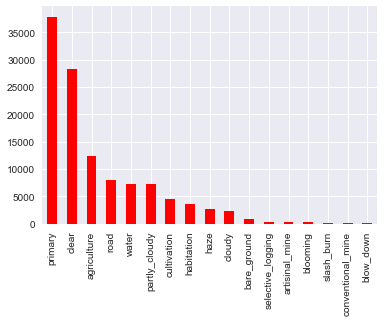

In [20]:
barlist=labels_df[label_list].sum().sort_values(ascending=0).plot.bar(color='r')

In [28]:
# Observe co-existence of labels
numeric_df = labels_df[label_list]; 
c_matrix = numeric_df.T.dot(numeric_df)
c_matrix

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,2695,2668,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2668,37840,11990,27668,7057,3471,7733,4455,209,331,7173,94,683,324,332,340,98
agriculture,672,11990,12338,9150,2718,2737,6036,3377,119,24,2492,24,225,38,32,65,22
clear,0,27668,9150,28203,5277,3090,6295,3527,173,0,0,70,744,307,311,308,85
water,613,7057,2718,5277,7262,915,2127,868,24,85,1287,26,206,299,16,49,3
habitation,129,3471,2737,3090,915,3662,2787,895,41,2,441,36,163,29,4,13,3
road,394,7733,6036,6295,2127,2787,8076,1294,36,5,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,4477,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,209,0,33,0,10,0,2,2,2
cloudy,0,331,24,0,85,2,5,0,0,2330,0,0,0,0,0,0,0


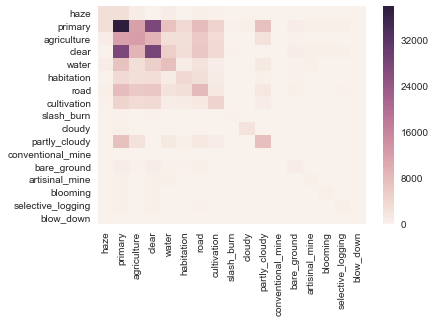

In [29]:
sns.heatmap(c_matrix)


In [32]:
# we observed that image can have multiple labels but it can have only one from each category
# example consider weather labels. each Image can be assigned only one weather label. 

weather_list = ['clear', 'partly_cloudy', 'haze', 'cloudy']
weather_df = labels_df[weather_list]; 
wc_matrix = weather_df.T.dot(weather_df)
wc_matrix


,clear,partly_cloudy,haze,cloudy
clear,28203,0,0,0
partly_cloudy,0,7251,0,0
haze,0,0,2695,0
cloudy,0,0,0,2330


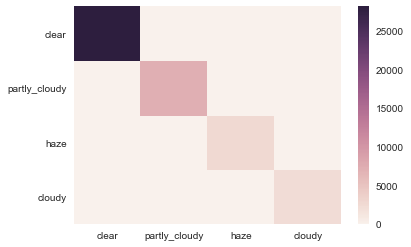

In [33]:
sns.heatmap(wc_matrix)

In [34]:
# example consider agriculture, water, road, bare_ground. 

other_list = ['agriculture', 'water', 'road', 'bare_ground']
other_df = labels_df[other_list]; 
oc_matrix = other_df.T.dot(other_df)
oc_matrix


,agriculture,water,road,bare_ground
agriculture,12338,2718,6036,225
water,2718,7262,2127,206
road,6036,2127,8076,323
bare_ground,225,206,323,859


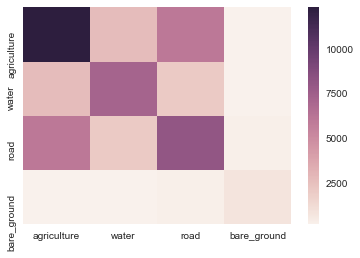

In [36]:
sns.heatmap(oc_matrix)

In [71]:
from glob import glob
image_paths = sorted(glob('./input/train-jpg/*.jpg'))[0:500]
image_names = list(map(lambda row: row.split("/")[-1][:-4], image_paths))
mimages = [img.replace('train-jpg\\', '') for img in image_names]
mimages[0:6]

['train_0', 'train_1', 'train_10', 'train_100', 'train_1000', 'train_10000']

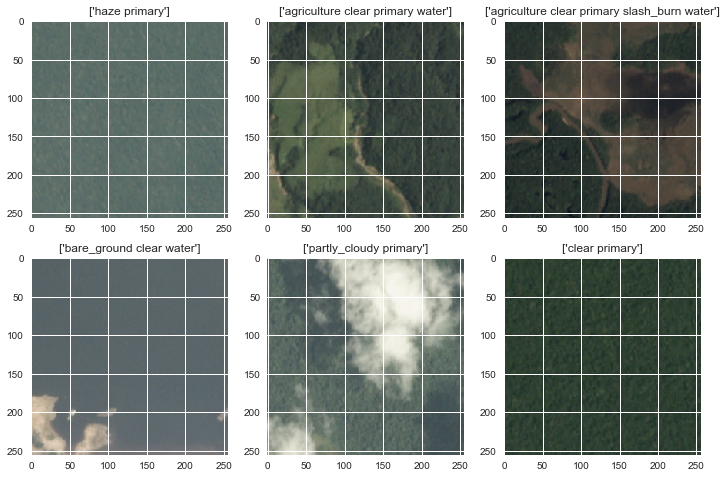

In [69]:
plt.figure(figsize=(12,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(plt.imread(image_paths[i]))
    plt.title(str(labels_df[labels_df.image_name == mimages[i]].tags.values))